## LV 2.

[3차] 파일명 정렬

2018 KAKAO BLIND RECRUITMENT

https://school.programmers.co.kr/learn/courses/30/lessons/17686

**문제 설명**

    파일명 정렬
    세 차례의 코딩 테스트와 두 차례의 면접이라는 기나긴 블라인드 공채를 무사히 통과해 카카오에 입사한 무지는 파일 저장소 서버 관리를 맡게 되었다.

    저장소 서버에는 프로그램의 과거 버전을 모두 담고 있어, 이름 순으로 정렬된 파일 목록은 보기가 불편했다. 파일을 이름 순으로 정렬하면 나중에 만들어진 ver-10.zip이 ver-9.zip보다 먼저 표시되기 때문이다.

    버전 번호 외에도 숫자가 포함된 파일 목록은 여러 면에서 관리하기 불편했다. 예컨대 파일 목록이 ["img12.png", "img10.png", "img2.png", "img1.png"]일 경우, 일반적인 정렬은 ["img1.png", "img10.png", "img12.png", "img2.png"] 순이 되지만, 숫자 순으로 정렬된 ["img1.png", "img2.png", "img10.png", img12.png"] 순이 훨씬 자연스럽다.

    무지는 단순한 문자 코드 순이 아닌, 파일명에 포함된 숫자를 반영한 정렬 기능을 저장소 관리 프로그램에 구현하기로 했다.

    소스 파일 저장소에 저장된 파일명은 100 글자 이내로, 영문 대소문자, 숫자, 공백(" "), 마침표("."), 빼기 부호("-")만으로 이루어져 있다. 파일명은 영문자로 시작하며, 숫자를 하나 이상 포함하고 있다.

    파일명은 크게 HEAD, NUMBER, TAIL의 세 부분으로 구성된다.

    - HEAD는 숫자가 아닌 문자로 이루어져 있으며, 최소한 한 글자 이상이다.
    - NUMBER는 한 글자에서 최대 다섯 글자 사이의 연속된 숫자로 이루어져 있으며, 앞쪽에 0이 올 수 있다. 0부터 99999 사이의 숫자로, 00000이나 0101 등도 가능하다.
    - TAIL은 그 나머지 부분으로, 여기에는 숫자가 다시 나타날 수도 있으며, 아무 글자도 없을 수 있다.
    
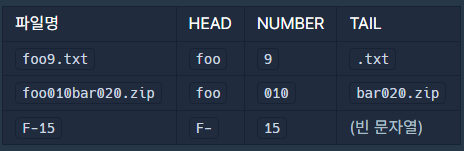    


    파일명을 세 부분으로 나눈 후, 다음 기준에 따라 파일명을 정렬한다.

    파일명은 우선 HEAD 부분을 기준으로 사전 순으로 정렬한다. 이때, 문자열 비교 시 대소문자 구분을 하지 않는다. MUZI와 muzi, MuZi는 정렬 시에 같은 순서로 취급된다.
    파일명의 HEAD 부분이 대소문자 차이 외에는 같을 경우, NUMBER의 숫자 순으로 정렬한다. 9 < 10 < 0011 < 012 < 13 < 014 순으로 정렬된다. 숫자 앞의 0은 무시되며, 012와 12는 정렬 시에 같은 같은 값으로 처리된다.
    두 파일의 HEAD 부분과, NUMBER의 숫자도 같을 경우, 원래 입력에 주어진 순서를 유지한다. MUZI01.zip과 muzi1.png가 입력으로 들어오면, 정렬 후에도 입력 시 주어진 두 파일의 순서가 바뀌어서는 안 된다.
    무지를 도와 파일명 정렬 프로그램을 구현하라.
    
    
**입력 형식**

    입력으로 배열 files가 주어진다.

    files는 1000 개 이하의 파일명을 포함하는 문자열 배열이다.
    각 파일명은 100 글자 이하 길이로, 영문 대소문자, 숫자, 공백(" "), 마침표("."), 빼기 부호("-")만으로 이루어져 있다. 파일명은 영문자로 시작하며, 숫자를 하나 이상 포함하고 있다.
    중복된 파일명은 없으나, 대소문자나 숫자 앞부분의 0 차이가 있는 경우는 함께 주어질 수 있다. (muzi1.txt, MUZI1.txt, muzi001.txt, muzi1.TXT는 함께 입력으로 주어질 수 있다.)
    
    
**출력 형식**

    위 기준에 따라 정렬된 배열을 출력한다.
    
**입출력 예제**

    입력: ["img12.png", "img10.png", "img02.png", "img1.png", "IMG01.GIF", "img2.JPG"]
    출력: ["img1.png", "IMG01.GIF", "img02.png", "img2.JPG", "img10.png", "img12.png"]

    입력: ["F-5 Freedom Fighter", "B-50 Superfortress", "A-10 Thunderbolt II", "F-14 Tomcat"]
    출력: ["A-10 Thunderbolt II", "B-50 Superfortress", "F-5 Freedom Fighter", "F-14 Tomcat"]

In [89]:
def solution(files):
    answer = []
    head, number, tail = '', '', ''
    
    for file in files:
        for i in range(len(file)):
            if file[i].isdigit():
                head = file[:i]
                number = file[i:]
                
                for j in range(len(number)):
                    if not number[j].isdigit():
                        tail = number[j:]
                        number = number[:j]
                        break
                
                answer.append([head, number, tail])
                head, number, tail = '','',''
                break
    
    return [''.join(ans) for ans in sorted(answer, key=lambda x: (x[0].lower(), int(x[1])))]

In [90]:
print(solution(["img12.png", "img10.png", "img02.png", "img1.png", "IMG01.GIF", "img2.JPG"]))
print(solution(["F-5 Freedom Fighter", "B-50 Superfortress", "A-10 Thunderbolt II", "F-14 Tomcat"]))

['img1.png', 'IMG01.GIF', 'img02.png', 'img2.JPG', 'img10.png', 'img12.png']
['A-10 Thunderbolt II', 'B-50 Superfortress', 'F-5 Freedom Fighter', 'F-14 Tomcat']


In [87]:
files = ["img12.png", "img10.png", "img02.png", "img1.png", "IMG01.GIF", "img2.JPG"]
answer = []
head, number, tail = '','',''

for file in files:
    for idx in range(len(file)):
        if file[idx].isdigit():
            head = file[:idx]
            number= file[idx:]
            
            for j in range(len(number)):
                if not number[j].isdigit():
                    tail = number[j:]
                    number = number[:j]
                    break
            answer.append([head, number, tail])
            head, number, tail ='', '',''
            break
            
[''.join(f) for f in sorted(answer, key = lambda x: (x[0].lower(), int(x[1])))]
            


['img1.png', 'IMG01.GIF', 'img02.png', 'img2.JPG', 'img10.png', 'img12.png']

In [48]:
files = ["img12.png", "img10.png", "img02.png", "img1.png", "IMG01.GIF", "img2.JPG"]

In [49]:
files =  ["F-5 Freedom Fighter", "B-50 Superfortress", "A-10 Thunderbolt II", "F-14 Tomcat"]

In [56]:
tmp = []
head, number, tail = '', '', ''

for f in files:
    for idx in range(len(f)):
        if f[idx].isdigit():
            head = f[:idx]
            number = f[idx:]
            print(f"head -> {head}")
            print(f"number -> {number}")
            
            for j in range(len(number)):
                if not number[j].isdigit():
                    tail = number[j:]
                    number = number[:j]
                    break
            
            tmp.append([head,number,tail])
            head, number, tail = '', '', ''
            break

answer = [''.join(file) for file in sorted(tmp, key=lambda x:(x[0].lower(), int(x[1])))]                
answer
        
    

head -> img
number -> 12.png
head -> img
number -> 10.png
head -> img
number -> 02.png
head -> img
number -> 1.png
head -> IMG
number -> 01.GIF
head -> img
number -> 2.JPG


['img1.png', 'IMG01.GIF', 'img02.png', 'img2.JPG', 'img10.png', 'img12.png']

In [7]:
for f in file2:
    print(f.split(' '))

['F-5', 'Freedom', 'Fighter']
['B-50', 'Superfortress']
['A-10', 'Thunderbolt', 'II']
['F-14', 'Tomcat']


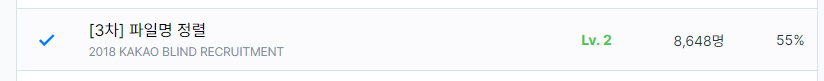

**다른 사람 풀이**

    - 정규표현식 제법 멋지다

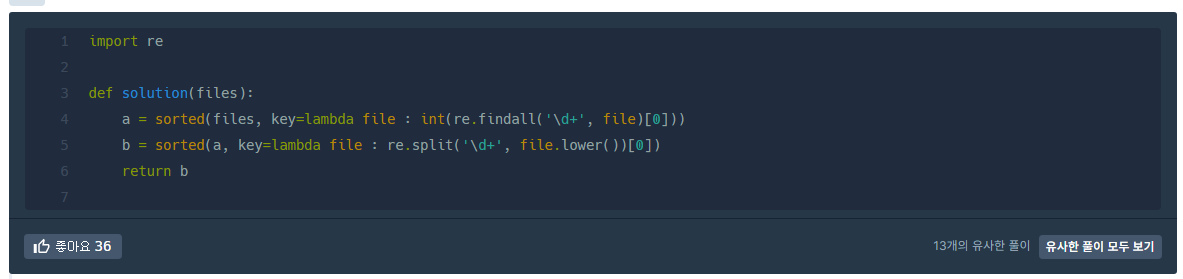

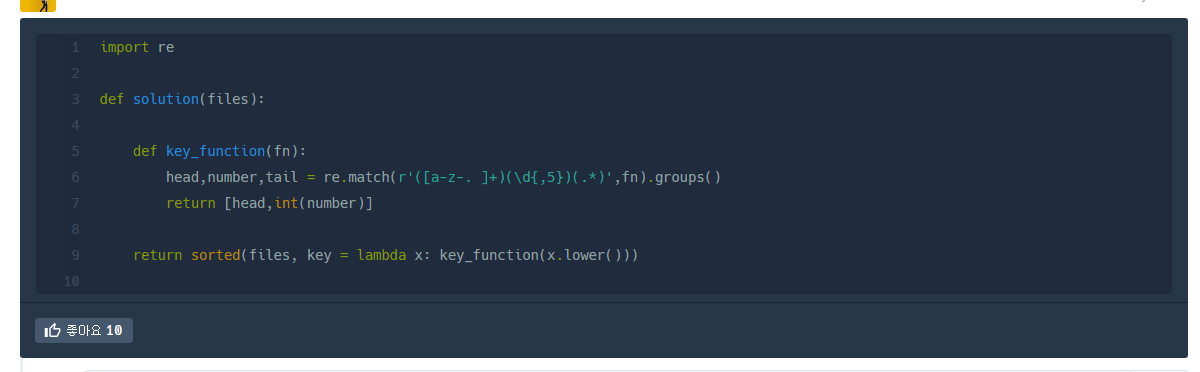

In [15]:
files = ["img12.png", "img10.png", "img02.png", "img1.png", "IMG01.GIF", "img2.JPG"]

In [17]:
import re

In [33]:
tmp = [re.split(r"([0-9]+)",f) for f in files]
sort = sorted(tmp, key=lambda x: (x[0].lower(), int(x[1])))

[''.join(s) for s in sort]

['img1.png', 'IMG01.GIF', 'img02.png', 'img2.JPG', 'img10.png', 'img12.png']